In [1]:
import pandas as pd
import sys
sys.path.insert(0, '..')
from utils.debate_utils import *
from analysis.plot_utils import *
import textwrap
from analysis.analysis_utils import *


In [2]:
from analysis_utils import *
df = load_all_records_into_df('human', filter_errors=False)
df = df[df['verdict_human'] != 'X']
df['verdict_human'] = df['verdict_human'].astype(int)
df['correct_idx_human'] = df['correct_idx_human'].astype(int)
df['confidence_human'] = df['confidence_human'].astype(float)
df['reasoning_wrapped'] = df['reasoning_human'].apply(lambda x: '<br>'.join(textwrap.wrap(str(x), width=60)) if pd.notna(x) else x)
df['is_correct_human'] = df['verdict_human'] == df['correct_idx_human']

In [3]:
def number_judge_interventions(debate_history):
    return len([turn for turn in debate_history if turn['persona'] == 'judge'])

df['num_turns_used'] = df['debate_history_human'].apply(lambda x: number_judge_interventions(x))
df['num_turns_used'].value_counts()

num_turns_used
4     3
7     2
24    1
15    1
5     1
10    1
3     1
12    1
Name: count, dtype: int64

### Analyze the results

In [4]:
pd.set_option('display.max_colwidth', 100)

display_df = df[[ 'question_idx_human', 'is_correct_human', 'confidence_human', 'config_dataset_name_human', 'reasoning_wrapped', 'num_turns_used']]
HTML(display_df.to_html(escape=False))

NameError: name 'HTML' is not defined

In [5]:
actions = []
for idx, row in df.iterrows():
    for entry in row['debate_history_human']:
        if entry['persona'] != 'judge':
            continue
        actions.append(entry['action'])
actions = pd.Series(actions)

actions.value_counts()

next                                                                                                                                                                                             19
end                                                                                                                                                                                              10
0: what part is flatly wrong? are you saying that this division does not equal 32.8 or that something else should be used as the numerator and demominator?                                       1
0: do you agree that this is your step by step claim? please highlight where you agree, not just where you disagree (if anywhere).                                                                1
1: thank you. can you dumb this down for me and show me step by step what debater 0 is suggesting and why you think it is incorrect?                                                              1
                    

In [6]:
print(actions[(actions != 'next') & (actions != 'end')].tolist())

['1: where do you disagree most strongly?', "0: let's stick with 1's initial critique of your position, which is that you are not considering the operator's magnitude. do you agree that you are not including the magnitude and, if so, why not?", "1: what is the simplest statement of your disagreement with 1's claim here? pick the claim that is the most suspect.", "1: without doing your own calculation, can you state the precise nature of this inconsistent scaling? please quote from 0's prior messages to show the inconsistency.", '1: you gave three quotes. which two are contradictory?', '0: please respond directly to the claim about these contradictory statements (and nothing else).', '1: why is it a contradiction to have the unnormalized dot product of 9.33 and then divide by 11.18?', '1: which value is flawed, .5 or .866?', "1: let's focus on one or the other. should we focus on the flaw in 0's geometric argument or the critique of your direct calculation? which do you believe most eas

### Look at verdict results

In [2]:
verdict_df = prepare_df(types=['verdicts'])
qa_df = prepare_df(types=['qa'])

NameError: name 'prepare_df' is not defined

In [ ]:
all_df = prepare_df(types=['human', 'verdicts'])

KeyError: 'record_id_debates'

In [5]:
debate_df['config_debater_model_human']

0     x-ai/grok-4-fast
1     x-ai/grok-4-fast
2     x-ai/grok-4-fast
3     x-ai/grok-4-fast
4     x-ai/grok-4-fast
5     x-ai/grok-4-fast
6     x-ai/grok-4-fast
7     x-ai/grok-4-fast
8     x-ai/grok-4-fast
9     x-ai/grok-4-fast
10    x-ai/grok-4-fast
11    x-ai/grok-4-fast
Name: config_debater_model_human, dtype: object

In [23]:
judge_qa_df = qa_df.copy()
judge_qa_df.columns = [col + '_judge' for col in qa_df.columns]

debater_qa_df = qa_df.copy()
debater_qa_df.columns = [col + '_debater' for col in qa_df.columns]

all_df = verdict_df.merge(
    judge_qa_df[['question_qa_judge', 'options_str_qa_judge', 'config_model_name_qa_judge', 'parsed_answer_qa_judge', 'is_correct_qa_judge', 'success_qa_judge']], 
    left_on=['question_verdicts', 'options_str_verdicts', 'config_judge_model_verdicts'], 
    right_on=['question_qa_judge', 'options_str_qa_judge', 'config_model_name_qa_judge'],
    how='left')

all_df = all_df.merge(
    debater_qa_df[['question_qa_debater', 'options_str_qa_debater', 'config_model_name_qa_debater', 'parsed_answer_qa_debater', 'is_correct_qa_debater', 'success_qa_debater']], 
    left_on=['question_verdicts', 'options_str_verdicts', 'config_debater_model_debates'], 
    right_on=['question_qa_debater', 'options_str_qa_debater', 'config_model_name_qa_debater'],
    how='left',
    suffixes=('', '_debater'))

In [24]:
all_df[all_df['verdict_run_id_verdicts'] == "49pyqat"]

,config_debate_run_id_verdicts,config_judge_model_verdicts,config_judge_reasoning_effort_verdicts,config_judge_reasoning_max_tokens_verdicts,config_judge_temperature_verdicts,config_max_output_tokens_verdicts,config_max_threads_verdicts,config_rerun_verdicts,config_skip_qa_verdicts,config_specific_record_ids_verdicts,...,config_model_name_qa_judge,parsed_answer_qa_judge,is_correct_qa_judge,success_qa_judge,question_qa_debater,options_str_qa_debater,config_model_name_qa_debater,parsed_answer_qa_debater,is_correct_qa_debater,success_qa_debater
0,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,0.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,1.0,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,1.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,1.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,0.0,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,0.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,1.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,1.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,1.0,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,human,openai/gpt-4o-mini,None,None,0.0,5000,200.0,0.0,0.0,None,...,openai/gpt-4o-mini,3.0,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### Look at turn duration

In [8]:
# Look at the turn duration

correct_debater_response_times = []
incorrect_debater_response_times = []
from collections import defaultdict
correct_by_turn_dict = defaultdict(list)
incorrect_by_turn_dict = defaultdict(list)
for idx, row in df.iterrows():
    correct_idx = row['correct_idx_human']
    num_correct_turns = 0
    num_incorrect_turns = 0
    for turn in row['debate_history_human']:
        if turn['persona'] != 'debater':
            continue
        if turn['debater_idx'] == correct_idx:
            correct_debater_response_times.append(turn['response_time'])
            correct_by_turn_dict[num_correct_turns].append(turn['response_time'])
            num_correct_turns += 1
        elif turn['debater_idx'] != correct_idx:
            incorrect_debater_response_times.append(turn['response_time'])
            incorrect_by_turn_dict[num_incorrect_turns].append(turn['response_time'])
            num_incorrect_turns += 1
correct_debater_response_times = pd.Series(correct_debater_response_times)
incorrect_debater_response_times = pd.Series(incorrect_debater_response_times)


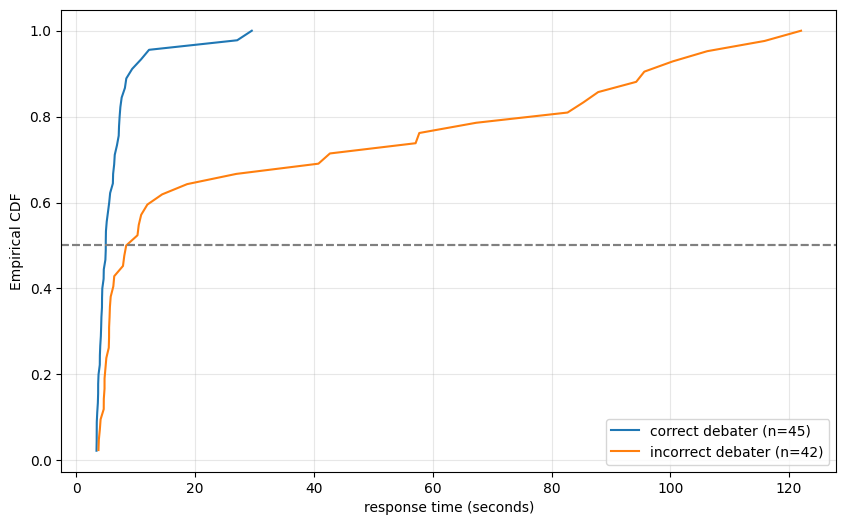

In [139]:
ax = cdf((correct_debater_response_times, incorrect_debater_response_times), labels=['correct debater', 'incorrect debater'])
ax.legend()
plt.xlabel('response time (seconds)')
plt.show()

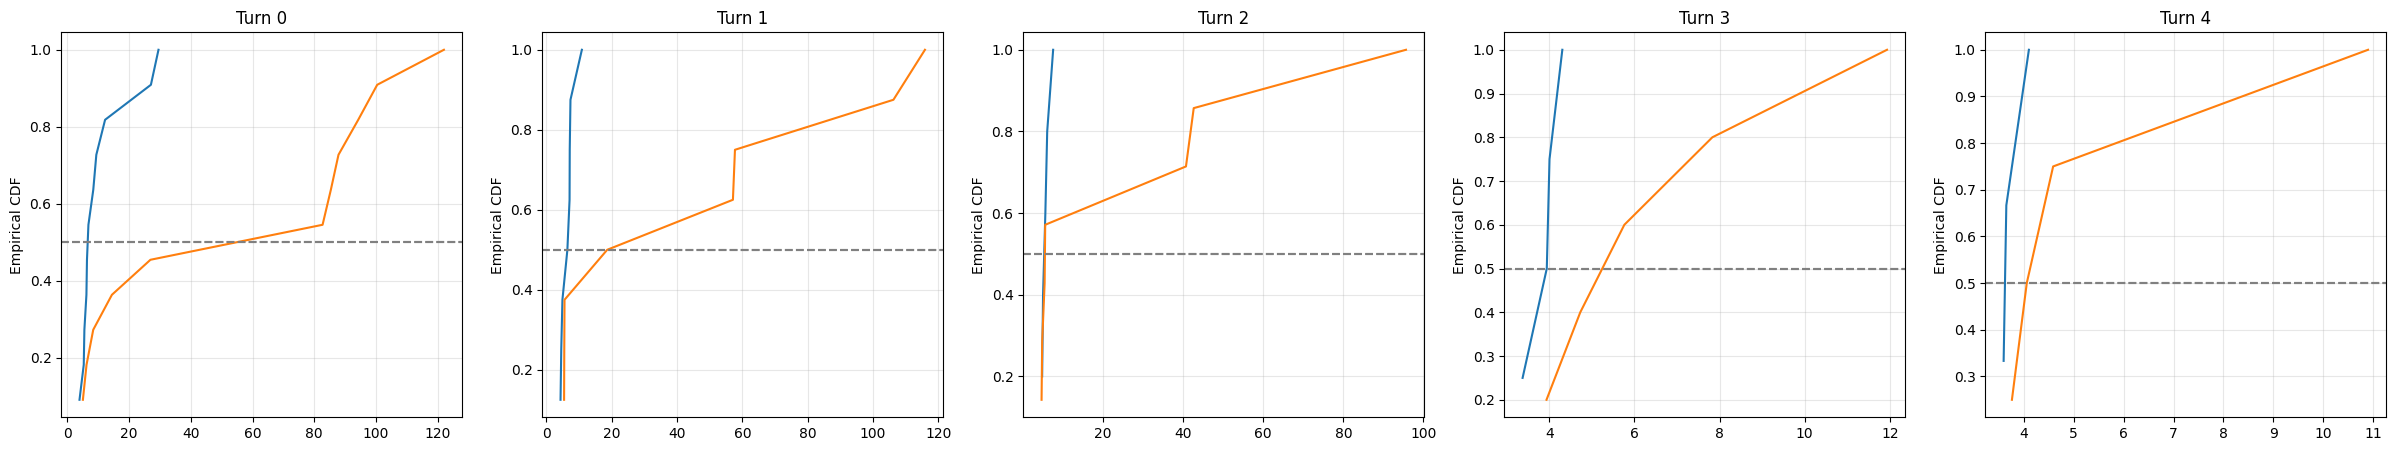

In [148]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))

# num_turns_per_debater = max(correct_by_turn_dict)
for i in range(5):
    if i in correct_by_turn_dict and i in incorrect_by_turn_dict:
        cdf((pd.Series(correct_by_turn_dict[i]), pd.Series(incorrect_by_turn_dict[i])), labels=['correct debater', 'incorrect debater'], ax=ax[i])
        ax[i].set_title(f'Turn {i}')
    